In [63]:
import pandas as pd 
import sys
import os 
from dotenv import load_dotenv


sys.path.append('C:\\Users\\Ourba\\Desktop\\10Academy\\10ac_week1_telecom_analysis\\src')
from loader import load_data


load_dotenv()

user = os.getenv('PG_USER')
password = os.getenv('PG_PASSWORD')
database_name = 'telecom'
table_name= 'xdr_data'
host = 'localhost'
port = '5432'

#Load data from Loader Module
df = load_data(host, port, user, password, database_name, table_name)
print(df.head())






      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [64]:
#import categorical data preproccessing module from utils.py
import importlib
import utils

importlib.reload(utils)
from utils import preproccess_categorical_data


from utils import preproccess_categorical_data
df[["Handset Manufacturer", "Handset Type"]]=preproccess_categorical_data(df[["Handset Manufacturer", "Handset Type"]])





In [65]:
#identifying the top 10 handsets used by the customers.
value_counts = df["Handset Type"].value_counts().reset_index()
# Selecting only the top ten values
value_counts.columns=['Handset Type','Handset count']
top_ten_values = value_counts.head(10)
top_ten_values = top_ten_values[top_ten_values['Handset Type'] != 'undefined']

print(top_ten_values)

                   Handset Type  Handset count
0              Huawei B528S-23A          20324
1       Apple iPhone 6S (A1688)           9419
2        Apple iPhone 6 (A1586)           9023
4        Apple iPhone 7 (A1778)           6326
5       Apple iPhone Se (A1723)           5187
6        Apple iPhone 8 (A1905)           4993
7       Apple iPhone Xr (A2105)           4568
8  Samsung Galaxy S8 (Sm-G950F)           4520
9        Apple iPhone X (A1901)           3813


C:\Users\Ourba\AppData\Local\Temp\ipykernel_19900\923290529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Handset Type', y='Handset count', data=top_ten_values, palette='Blues')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Huawei B528S-23A'),
  Text(1, 0, 'Apple iPhone 6S (A1688)'),
  Text(2, 0, 'Apple iPhone 6 (A1586)'),
  Text(3, 0, 'Apple iPhone 7 (A1778)'),
  Text(4, 0, 'Apple iPhone Se (A1723)'),
  Text(5, 0, 'Apple iPhone 8 (A1905)'),
  Text(6, 0, 'Apple iPhone Xr (A2105)'),
  Text(7, 0, 'Samsung Galaxy S8 (Sm-G950F)'),
  Text(8, 0, 'Apple iPhone X (A1901)')])

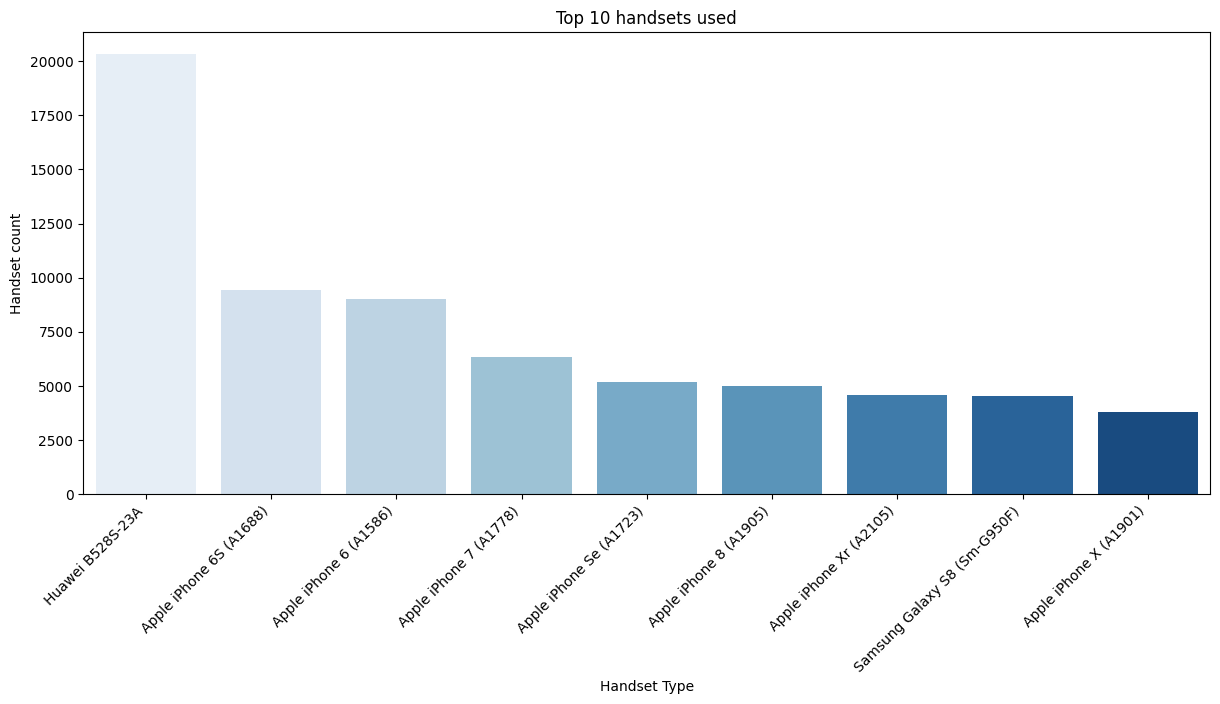

In [66]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(32, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x='Handset Type', y='Handset count', data=top_ten_values, palette='Blues')
plt.title('Top 10 handsets used')
plt.xticks(rotation=45, ha='right')

In [67]:
value_counts = df["Handset Manufacturer"].value_counts()
top_three_values = value_counts.head(3)
# Display the top 3 Handset Manufacturers
print(top_three_values)

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


<BarContainer object of 3 artists>

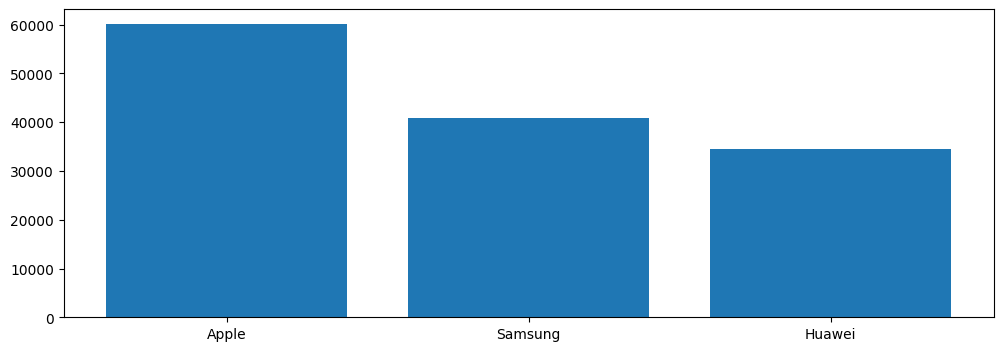

In [68]:
#visualazation
plt.figure(figsize=(12, 4))
plt.bar(top_three_values.index,top_three_values.values)

In [69]:
#Next, identify the top 5 handsets per top 3 handset manufacturer
manufacturer_column = 'Handset Manufacturer'
handset_column = 'Handset Type'

# Grouping by manufacturer and counting occurrences of each handset
grouped_data = df.groupby(manufacturer_column)[handset_column].value_counts()

# Identifying the top 3 handset manufacturers
top_manufacturers = df[manufacturer_column].value_counts().head(3).index

# Initializing a dictionary to store the top 5 handsets for each manufacturer
top_handsets_per_manufacturer = {}

# Iterating over the top handset manufacturers
for manufacturer in top_manufacturers:
    # Retrieving the top 5 handsets for each manufacturer
    top_handsets = grouped_data[manufacturer].head(5)
    top_handsets_per_manufacturer[manufacturer] = top_handsets

# Printing the top 5 handsets for each manufacturer
for manufacturer, top_handsets in top_handsets_per_manufacturer.items():
    print(f"Top 5 handsets for {manufacturer}:\n{top_handsets}\n")

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64



C:\Users\Ourba\AppData\Local\Temp\ipykernel_19900\3844284765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')
C:\Users\Ourba\AppData\Local\Temp\ipykernel_19900\3844284765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')
C:\Users\Ourba\AppData\Local\Temp\ipykernel_19900\3844284765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')


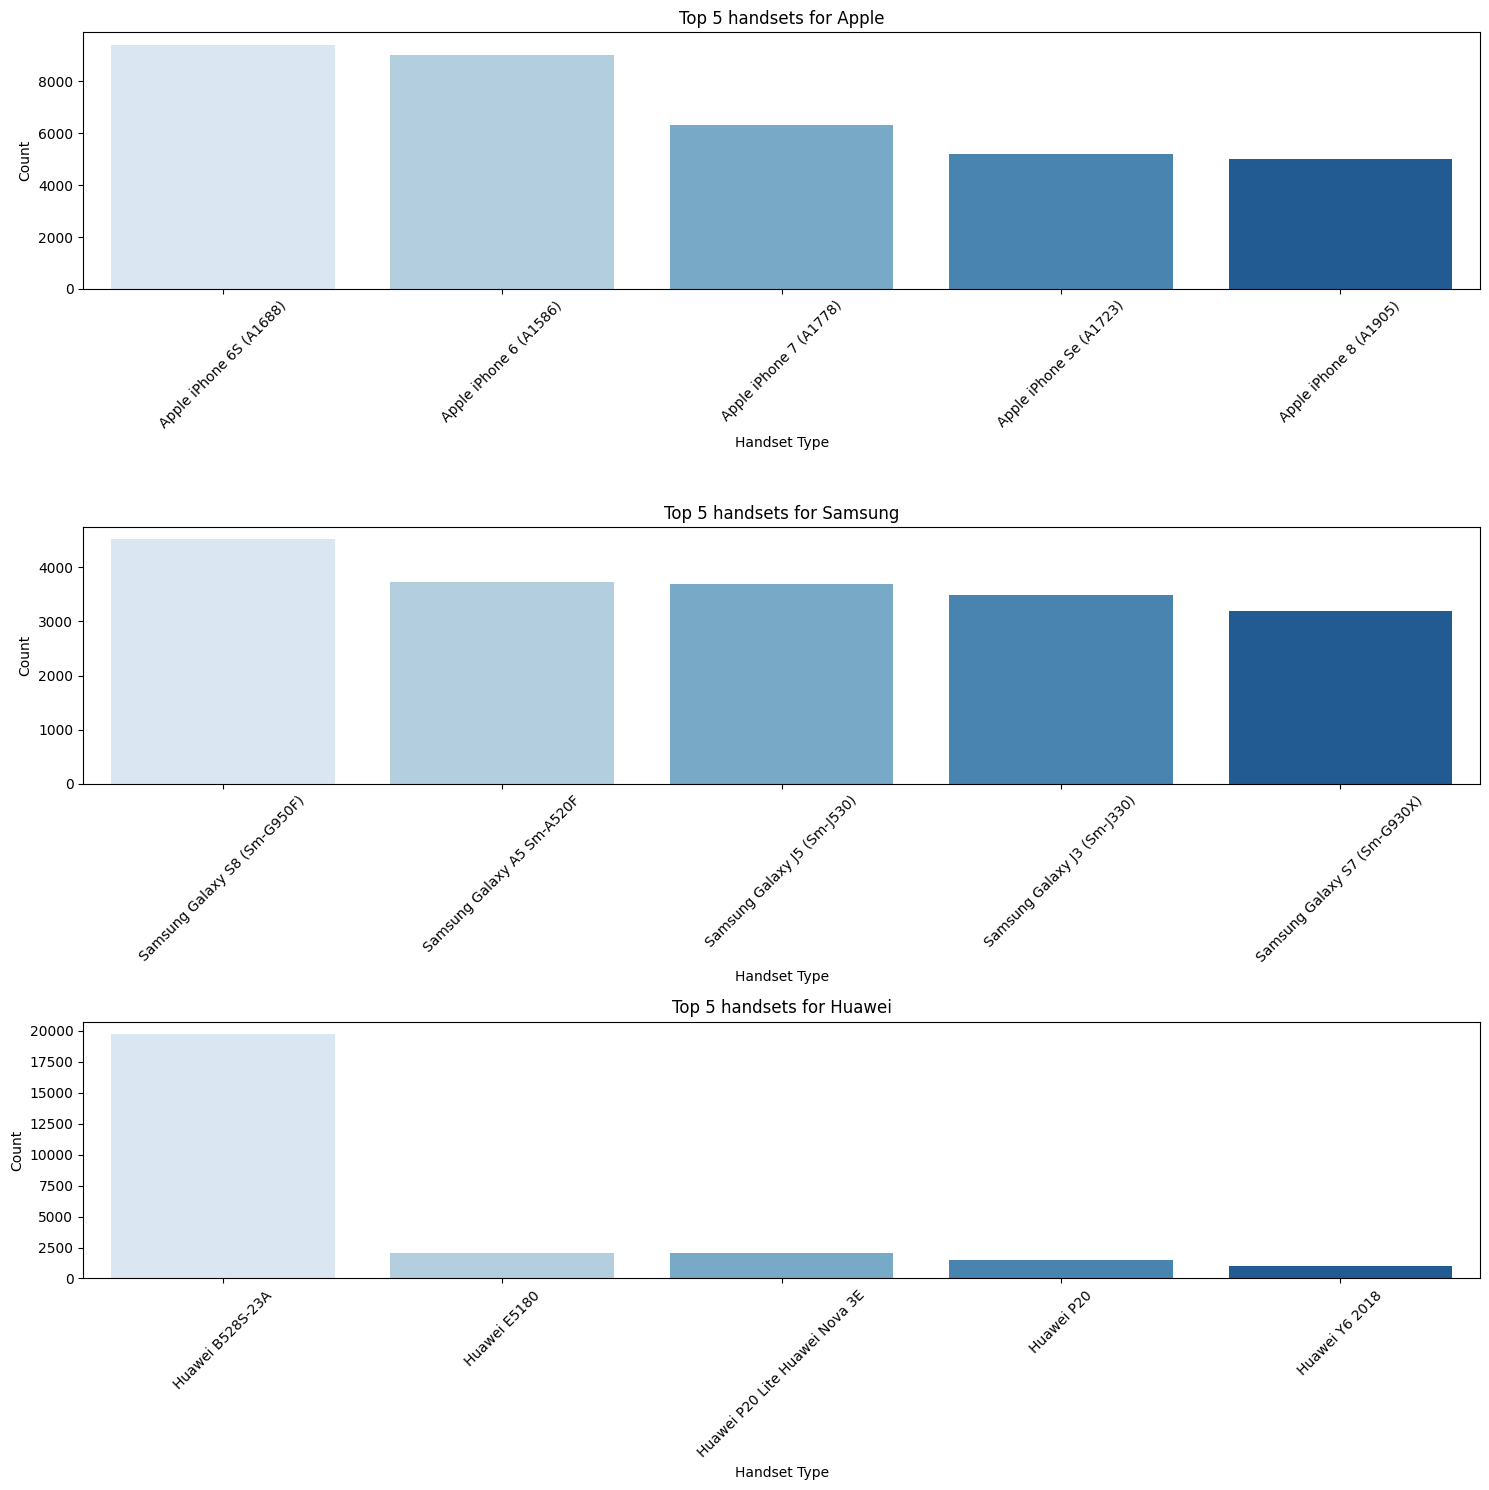

In [70]:
# Visualizing the top 5 handsets for each manufacturer using seaborn
plt.figure(figsize=(15, 15))

for i, (manufacturer, top_handsets) in enumerate(top_handsets_per_manufacturer.items()):
    plt.subplot(3, 1, i+1)
    sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')
    plt.title(f'Top 5 handsets for {manufacturer}')
    plt.xlabel('Handset Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Interpretation:

The overwhelming preference for Apple devices, particularly the iPhone 6S and iPhone 6, indicates a strong market share for Apple within your customer base.
This dominance could potentially shape the direction of your network offerings and services to cater better to iPhone users.
Recommendations to the Telecom Marketing Team:

Tailored Data Plans: Offer data plans that are optimized for iPhone users, perhaps with features like seamless iCloud backup or exclusive app streaming services.
Device Upgrade Programs: Leverage the popularity of the iPhone 6S and iPhone 6 to launch targeted device upgrade programs. These can entice customers to switch to newer iPhone models or even consider other Apple products.
Exclusive Apple Bundles: Partner with Apple to offer exclusive bundles that combine your telecom services with Apple's ecosystem. This could include special deals on Apple Music, iCloud storage, or even AppleCare services.
Network Performance Assurance: Ensure that your network offers the best performance and reliability for Apple devices. This can be a unique selling point to attract and retain iPhone users.
Customer Support & Training: Given the popularity of Apple devices, offer specialized customer support and training services tailored to iPhone users. This can include workshops on optimizing network settings, troubleshooting common issues, and getting the most out of their devices.
Competitive Analysis: Keep an eye on emerging handset trends and competitor offerings. While Apple is currently dominant, the landscape can change rapidly with the introduction of new devices or technologies. Stay agile and be prepared to adapt your strategies accordingly.
Feedback and Engagement: Engage with your iPhone user community through surveys, feedback sessions, and focus groups. Understand their needs, preferences, and pain points to continuously refine your offerings and deliver exceptional customer experiences.

In [71]:
# number of users 
number_of_users = df['MSISDN/Number'].nunique()
# telecom[ 'MSISDN/Number'].isna().sum()
print (f"number of users = {number_of_users}")

number of users = 106856


In [72]:
#number of sessions
df['Bearer Id'].nunique()

134708

In [73]:
# the total download (DL) and upload (UL) data
total_dl = df['Total DL (Bytes)'].sum()
total_ul = df[ 'Total UL (Bytes)'].sum()
print (total_dl,"and", total_ul)

68196514511845.0 and 6168180943816.0


In [74]:
# Aggregate per user
user_aggregated = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',               # Number of xDR sessions
    'Dur. (ms)': 'sum',      # Total session duration
    'Total DL (Bytes)': 'sum',          # Total download data
    'Total UL (Bytes)': 'sum'           # Total upload data
})
user_aggregated.columns = ['Number of xDR sessions', 'Total Session Duration (s)',
                           'Total Download (Bytes)', 'Total Upload (Bytes)']

user_aggregated


,Number of xDR sessions,Total Session Duration (s),Total Download (Bytes),Total Upload (Bytes)
MSISDN/Number,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...
3.379000e+10,1,8810.0,6.879252e+08,26716429.0
3.379000e+10,1,140988.0,4.445751e+08,35732243.0
3.197021e+12,1,877385.0,1.948281e+08,37295915.0


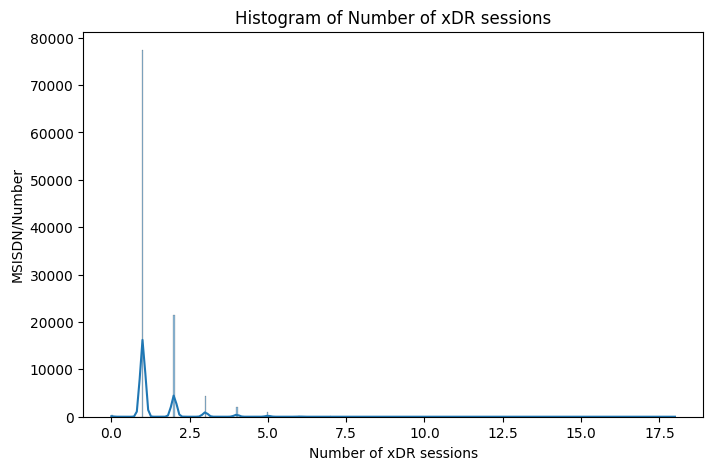

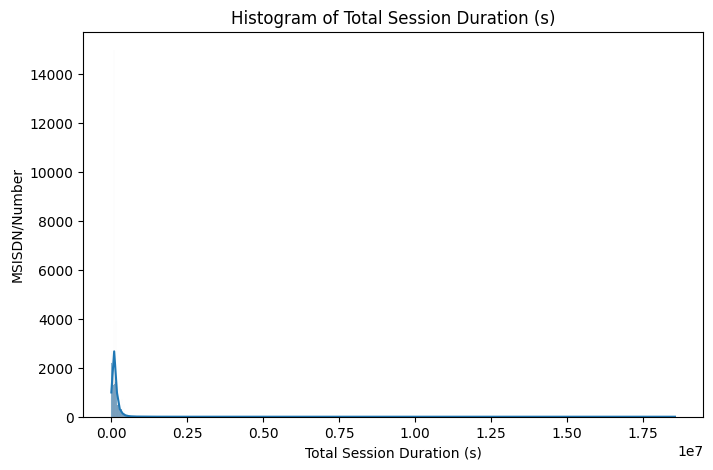

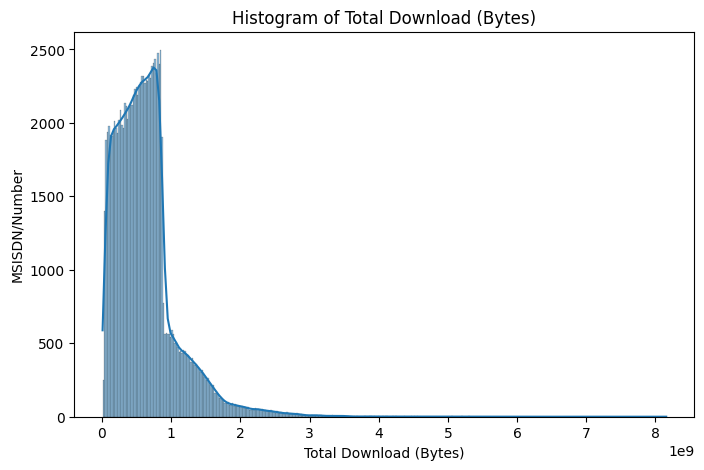

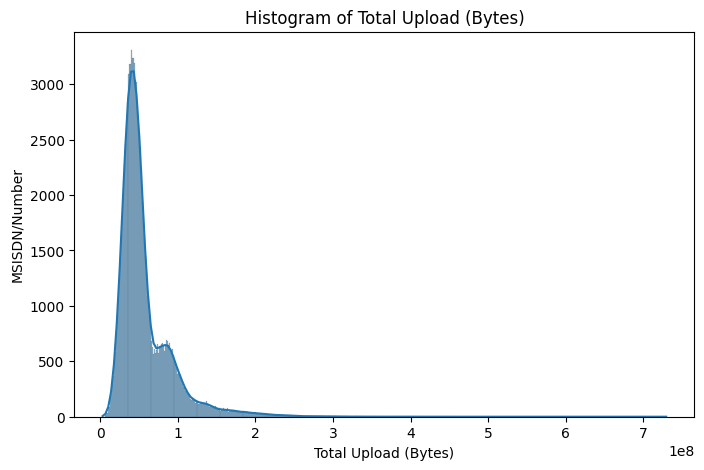

In [77]:
# Plot histograms for selected variables
selected_variables = ['Number of xDR sessions', 'Total Session Duration (s)',
                           'Total Download (Bytes)', 'Total Upload (Bytes)']

for variable in selected_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(user_aggregated[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.ylabel('MSISDN/Number')
    plt.show()
